# Geospatial Bootstrap

The goal of this Notebook is to provide links, snippets and examples to help start analysing geospatial data in Python using **GeoPandas** and **Lithops**. The tool is geared towards Catalan geographical sources containing data from the province of Tarragona.

## Index
- [Obtaining geospatial data](#Obtaining-geospatial-data)
- [GeoPandas basics](#GeoPandas-basics)
- [Lithops basics](#Lithops-basics)
- [Examples](#Examples)

In [3]:
import numpy as np       # https://numpy.org/doc/
import geopandas as gpd  # https://geopandas.org/docs.html
import lithops           # https://github.com/lithops-cloud/lithops

## Obtaining geospatial data

### Get open data from the public administration

- [Institut Cartogràfic de Catalunya (ICGC)](https://www.icgc.cat/en/Downloads)
- [Institut d'Estadística de Catalunya (IDESCAT)](https://www.idescat.cat/?lang=en)
- [Generalitat de Catalunya](https://analisi.transparenciacatalunya.cat/ca/)
- [Gobierno de España](https://datos.gob.es/)
- [Ajuntament de Tarragona](https://www.tarragona.cat/governobert/dades-obertes)
- [Ajuntament de Reus](https://opendata.reus.cat/)

Example: go to the following ICGC link and select Download SHP.
- [Administration boundaries (Catalunya)](https://www.icgc.cat/en/Public-Administration-and-Enterprises/Downloads/Geoinformation-layers/Administration-boundaries)

### Get data from general sources

- [Google Dataset Search engine](https://datasetsearch.research.google.com/)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [AWS Open Data Registry](https://registry.opendata.aws/)
- [GeoJSON.xyz](http://geojson.xyz/)

Example: go to the following Kaggle link, go to the Data explorer and download the 3_Airports_ports folder content.

- [Geospatial environmental and socioeconomic data](https://www.kaggle.com/cathetorres/geospatial-environmental-and-socioeconomic-data)

### Get data from APIs

APIs may require registration and/or approval for access.
- [Sentinel API](https://www.sentinel-hub.com/develop/api/)
- [OpenWeather API](https://openweathermap.org/api)

Depending on your particular task, these may come in handy:
- [Twitter Developer API](https://developer.twitter.com/en/apply-for-access)

## GeoPandas basics

GeoPandas is the recommended tool in this notebook to manipulate geospatial data. 

GeoPandas extends the pandas library (the most popular data manipulation tool in Python), and thus all documentation for the pandas library is valid for GeoPandas as well. When faced with a question or bug that is not related with geospatial features, you may want to look for generic pandas documentation.

### Concepts

- [ndarray](https://numpy.org/doc/stable/reference/arrays.ndarray.html)
- [Series](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#series)
- [GeoSeries](https://geopandas.org/reference/geopandas.GeoSeries.html#geopandas-geoseries)
- [DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe)
- [GeoDataFrame](https://geopandas.org/reference/geopandas.GeoSeries.html#geopandas-geoseries)
- [matplotlib integration with pandas](https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html)

### Reading data

GeoPandas reads data directly from vector files with its `read_file()` API. `read_file()` loads a vector spatial file into a GeoDataFrame type variable. Further information is provided [here](https://geopandas.org/docs/user_guide/io.html).

In [ ]:
# Read GeoJSON from URL

geojson_url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_land.geojson"

gdf = gpd.read_file(geojson_url)

In [ ]:
# Read shapefile (.shp) locally

shapefile_abs_path = "<ABSOLUTE_PATH_TO_SHAPEFILE>"

gdf = gpd.read_file(shapefile_abs_path)

In [ ]:
# Read a shapefile (.shp) locally from zip

zipfile_abs_path = "/home/sergi/cloudbutton/geospatial-bootstrap/data/bm5mv21sh0tc1_20200601_0.zip"
shapefile_name = "bm5mv21sh0tpm1_20200601_0.shp"

gdf = gpd.read_file("zip://" + zipfile_abs_path + "!" + shapefile_name)

In [4]:
# Read a shapefile (.shp) from a zip located in a IBM COS bucket
# NOTE: look at example 1 for the Lithops Storage API

endpoint = "s3.eu-de.cloud-object-storage.appdomain.cloud" 
bucket = "tarragona-public-data"  # Public bucket (free access)
obj = "bm5mv21sh0tc1_20200601_0.zip"
shapefile_name = "bm5mv21sh0tpm1_20200601_0.shp"

gdf = gpd.read_file(
    "zip+https://" +  # IBM COS objects can be accessed via HTTP
    endpoint + "/" + 
    bucket + "/" + 
    obj + "!" + 
    shapefile_name
)

### Data exploration

Quickly get a grasp of the data you are working with:

In [5]:
gdf.head()   # Prints first 5 lines

,CODIMUNI,NOMMUNI,AREAOFI,AREAPOL,CODICOMAR,CODIPROV,VALIDDE,DATAALTA,geometry
0,080018,Abrera,None,19.9784,11,08,None,202001011200,"POLYGON ((410315.500 4598888.500, 410888.800 4..."
1,080023,Aguilar de Segarra,43.2198,43.2198,07,08,20160727,201707262100,"POLYGON ((384322.708 4625199.422, 384343.603 4..."
2,080039,Alella,None,9.6191,21,08,None,202006011200,"POLYGON ((440348.121 4596214.305, 440355.521 4..."
3,080044,Alpens,13.7788,13.7788,24,08,20171213,201801101500,"POLYGON ((425099.400 4665989.600, 425142.800 4..."
4,080057,l'Ametlla del Vallès,None,14.0885,41,08,None,202006011200,"POLYGON ((436900.772 4617083.908, 436882.966 4..."


Important note:
"*The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame's “geometry”.*
"
Instead of regularly accessing the geometry column like you would access a column in regular pandas (i.e. `gdf["<COLUMN_NAME>"]`), you can do:

In [68]:
gdf.geometry  # this points to whichever column holds the relevant GeoSeries data

763    POLYGON ((366871.781 4585034.640, 366874.081 4...
764    POLYGON ((374769.705 4569362.444, 374782.213 4...
765    POLYGON ((340668.502 4570047.461, 340679.093 4...
766    MULTIPOLYGON (((293731.670 4495729.380, 293731...
767    POLYGON ((348803.909 4574253.271, 348804.978 4...
                             ...                        
942    POLYGON ((301179.478 4521621.964, 301183.834 4...
943    POLYGON ((298372.912 4520080.929, 298512.331 4...
944    MULTIPOLYGON (((345810.870 4546572.330, 345807...
945    MULTIPOLYGON (((308777.860 4521146.720, 308777...
946    POLYGON ((346261.400 4555701.400, 346505.500 4...
Name: geometry, Length: 184, dtype: geometry

In [ ]:
# By default, the geometry column is named "geometry".
# You can optionally change the column name (in which case, 
# set here the column name as you please)
gdf.set_geometry("<COLUMN_NAME>")

In [ ]:
print(type(gdf.geometry))                     # GeoSeries
print(type(gdf["<SOME_OTHER_COLUMN_NAME>"]))  # Series

[Coordinate system](https://geopandas.org/docs/user_guide/projections.html#coordinate-reference-systems) of our data:

In [64]:
gdf.crs

<Projected CRS: EPSG:25831>
Name: ETRS89 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 0°E and 6°E: Andorra; Belgium - onshore and offshore; Denmark - offshore; Germany - offshore; Jan Mayen - offshore; Norway including Svalbard - onshore and offshore; Spain - onshore and offshore.
- bounds: (0.0, 37.0, 6.01, 82.41)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Some regular pandas operations:

In [ ]:
# How many columns does the GeoDataFrame have?
print(len(gdf.columns))

# Select all columns except one
column_i_want_to_drop = "<COLUMN_NAME>"
gdf_without_geometry = gdf.drop(column_i_want_to_drop, axis='columns')  # or axis=1

# If we want to remove the column without creating a new dataframe:
# gdf.drop(column_i_want_to_drop, axis='columns', inplace=True)

column = gdf_without_geometry.iloc[:, 0]     # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
column = gdf_without_geometry.iloc[2:, -1]
column = gdf_without_geometry.iloc[2:10, 2]

# Select a random column
gdf.sample(axis='columns')

# Get the index of a column for which we know the label
other_column_index = gdf.columns.get_loc("<COLUMN_NAME>")

### Geospatial queries

In [6]:
gdf.geometry.centroid

0      POINT (409047.003 4596656.880)
1      POINT (385062.751 4620675.272)
2      POINT (440894.838 4594421.322)
3      POINT (424944.643 4663612.589)
4      POINT (438079.583 4612686.210)
                    ...              
942    POINT (301996.333 4517278.599)
943    POINT (298659.456 4513761.727)
944    POINT (344136.055 4549241.695)
945    POINT (305200.808 4520500.271)
946    POINT (347280.064 4553081.614)
Length: 947, dtype: geometry

For a certain point in the map, find the nearest town centroid:

In [20]:
from shapely.geometry import Point

point = Point(301996.333, 4517278.599)
distances = gdf.geometry.distance(point)
print(distances)

0      129107.198344
1      127455.511654
2      157300.350995
3      188878.608037
4      164051.574570
           ...      
942         0.000000
943      1648.730828
944     50497.850897
945      1297.023873
946     55824.018716
Length: 947, dtype: float64


In [23]:
gdf[distances == min(distances)]

,CODIMUNI,NOMMUNI,AREAOFI,AREAPOL,CODICOMAR,CODIPROV,VALIDDE,DATAALTA,geometry
942,439039,Camarles,None,25.1947,09,43,None,201907011500,"POLYGON ((301179.478 4521621.964, 301183.834 4..."


### Plotting

Plotting is extremely easy with GeoPandas:

<AxesSubplot:>

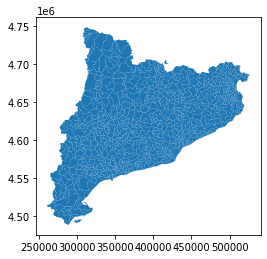

In [7]:
gdf.plot()  # generates the plot based on the geometry column

# Outside of Jupyter:

# import matplotlib.pyplot as plt
# municipis.plot()

# plt.show()
# or
# plt.save()

<AxesSubplot:>

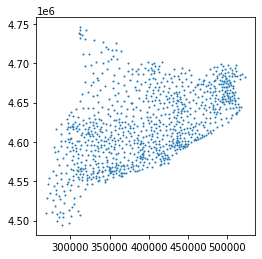

In [47]:
gdf.geometry.centroid.plot(markersize=1)  # other GeoSeries objects can be plotted, too

You can filter data in a GeoPandas DataFrame the same way you would filter a Pandas DataFrame. (Notice that in the following snippet we use the `43` to obtain Tarragona province geometries, as specified [here](https://www.idescat.cat/codis/?id=50&n=11). Other Catalan administration codes can be obtained [here](https://www.idescat.cat/codis/?id=50&n=9) or at Wikidata, e.g. [province of Tarragona identifiers](https://www.wikidata.org/wiki/Q98392#identifiers))

<AxesSubplot:>

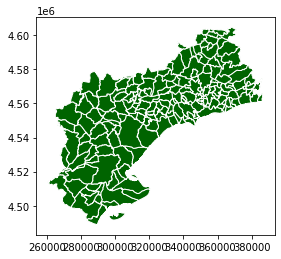

In [49]:
# Filtering data from Tarragona and assigning to a new GeoDataFrame
gdf_tgn = gdf[gdf['CODIPROV'] == '43']
gdf_tgn.plot(color="darkgreen", edgecolor="white")

<AxesSubplot:>

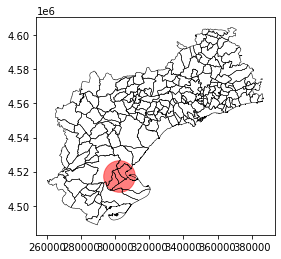

In [55]:
from shapely.geometry import Point

point = gpd.GeoSeries(Point(301996.333, 4517278.599))
tgn = gdf_tgn.boundary.plot(color="black", linewidth=0.5)

point.plot(ax=tgn, color="red", markersize=1000, alpha=0.5)

## Lithops basics

**Requirement**: you must provide lithops configuration credentials. [Follow these instructions](https://github.com/lithops-cloud/lithops/tree/master/config#lithops-configuration).

In [ ]:
lithops.LocalhostExecutor()

## Examples

In [56]:
# Examples using GeoPandas and Lithops